# **Summer** **Olympics** **Data** **Analysis** 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
olympics = pd.read_csv('summer.csv')
olympics.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [10]:
# get to know about the whole dataset
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [9]:
olympics.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [12]:
#checking the null values if any
nan_values = olympics.isna()
nan_columns = nan_values.any()
nan_columns

Year          False
City          False
Sport         False
Discipline    False
Athlete       False
Country        True
Gender        False
Event         False
Medal         False
dtype: bool

In [14]:
# checking how many null values are there in the dataset
olympics.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

**1.** **In** **how** **many** **cities** **Summer** **Olympics** **is** **held** **so** **far** **?**

In [16]:
cities = olympics['City'].unique()
print("The Number of Cities in which Summer Olympics is held are", len(cities))
print(cities)

The Number of Cities in which Summer Olympics is held are 22
['Athens' 'Paris' 'St Louis' 'London' 'Stockholm' 'Antwerp' 'Amsterdam'
 'Los Angeles' 'Berlin' 'Helsinki' 'Melbourne / Stockholm' 'Rome' 'Tokyo'
 'Mexico' 'Munich' 'Montreal' 'Moscow' 'Seoul' 'Barcelona' 'Atlanta'
 'Sydney' 'Beijing']


**2. Which sport is having most number of Gold Medals so far? (Top 5)**

,Sport,Medal
0,Aquatics,1421
2,Athletics,1215
28,Rowing,890
17,Gymnastics,820
14,Fencing,552


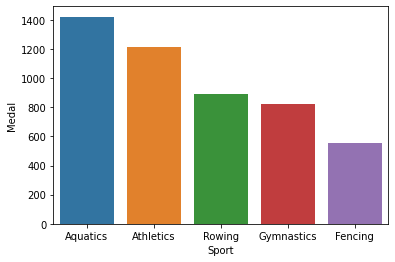

In [20]:
sports = olympics[olympics['Medal']=='Gold'].groupby('Sport').agg({'Medal': 'count'})
sports.reset_index(inplace=True)
sports.sort_values(by='Medal',ascending=False,inplace=True)
sports = sports.head()
sns.barplot(x='Sport',y='Medal',data= sports)
sports

**3. Which sport is having most number of medals so far? (Top 5)**

,Sport,Medal
0,Aquatics,4170
2,Athletics,3638
28,Rowing,2667
17,Gymnastics,2307
14,Fencing,1613


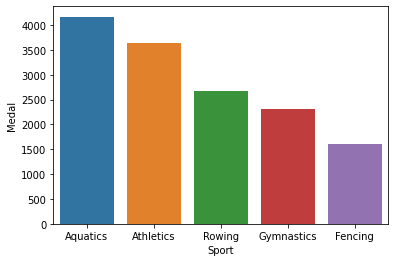

In [21]:
medals = olympics.groupby('Sport').agg({'Medal': 'count'})
medals.reset_index(inplace=True)
medals.sort_values(by='Medal',ascending=False,inplace=True)
medals = medals.head()
sns.barplot(x='Sport',y='Medal',data=medals)
medals

**4. Which player has won most number of medals? (Top 5)**

,Athlete,Medal
15702,"PHELPS, Michael",22
11202,"LATYNINA, Larisa",18
511,"ANDRIANOV, Nikolay",15
12476,"MANGIAROTTI, Edoardo",13
14883,"ONO, Takashi",13


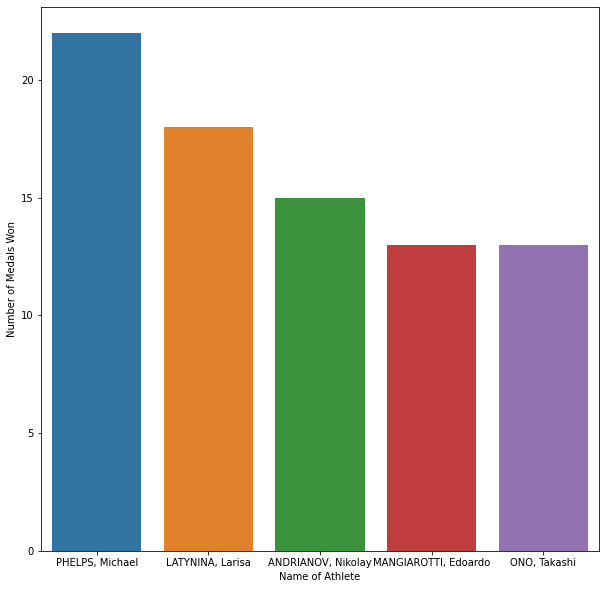

In [23]:
player = olympics.groupby('Athlete').agg({'Medal': 'count'})
player.reset_index(inplace=True)
player.sort_values(by='Medal',ascending=False,inplace=True)
player = player.head()
a_dimension = (10, 10)
fig, ax = plt.subplots(figsize=a_dimension)
sns.barplot(x='Athlete',y='Medal',data=player,ax=ax)
plt.xlabel("Name of Athlete")
plt.ylabel("Number of Medals Won")
player

**5. Which player has won most number Gold Medals of medals? (Top 5)**

,Athlete,Medal
5712,"PHELPS, Michael",18
4186,"LEWIS, Carl",9
5332,"NURMI, Paavo",9
6905,"SPITZ, Mark",9
4066,"LATYNINA, Larisa",9


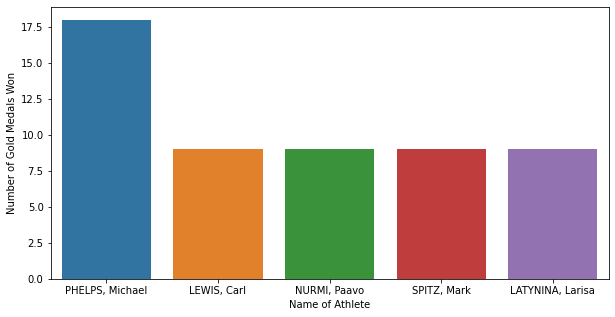

In [25]:
gold_medals = olympics[olympics['Medal']=='Gold'].groupby('Athlete').agg({'Medal': 'count'})
gold_medals.reset_index(inplace=True)
gold_medals.sort_values(by='Medal',ascending=False,inplace=True)
gold_medals = gold_medals.head()
a_dimension = (10, 5)
fig, ax = plt.subplots(figsize=a_dimension)
sns.barplot(x='Athlete',y='Medal',data=gold_medals,ax=ax)
plt.xlabel("Name of Athlete")
plt.ylabel("Number of Gold Medals Won")
gold_medals

**6. In which year India won first Gold Medal in Summer Olympics?**

In [27]:
India_first_medal_year = olympics[(olympics['Medal']=='Gold') & (olympics['Country']=='IND')].head(1)
print(" India won its first Gold Medal in", India_first_medal_year['Year'].values[0],"in",India_first_medal_year['City'].values[0],"for sport of",India_first_medal_year['Sport'].values[0])
India_first_medal_year

 India won its first Gold Medal in 1928 in Amsterdam for sport of Hockey


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold


**7. Which event is most popular in terms on number of players? (Top 5)**

,Event,Athlete
477,Football,1497
489,Hockey,1422
614,Team Competition,1147
403,Basketball,1012
483,Handball,973


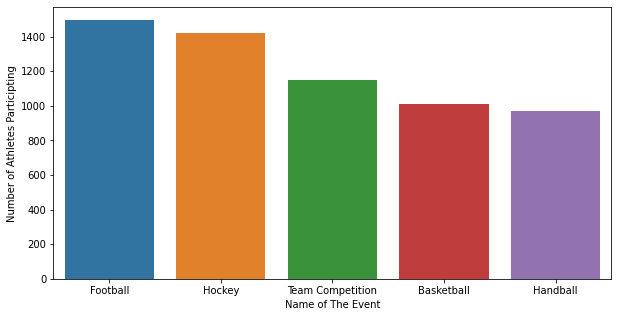

In [29]:
popular_Event = olympics.groupby('Event').agg({'Athlete': 'count'})
popular_Event.reset_index(inplace=True)
popular_Event.sort_values(by='Athlete',ascending=False,inplace=True)
popular_Event = popular_Event.head()
a_dimension = (10, 5)
fig, ax = plt.subplots(figsize=a_dimension)
sns.barplot(x='Event',y='Athlete',data=popular_Event,ax=ax)
plt.xlabel("Name of The Event")
plt.ylabel("Number of Athletes Participting")
popular_Event

**8. Which sport is having most female Gold Medalists? (Top 5)**

,Athlete,Medal
945,"LATYNINA, Larisa",9
1758,"THOMPSON, Jenny",8
477,"FISCHER, Birgit",8
239,"CASLAVSKA, Vera",7
1849,"VEZZALI, Valentina",6


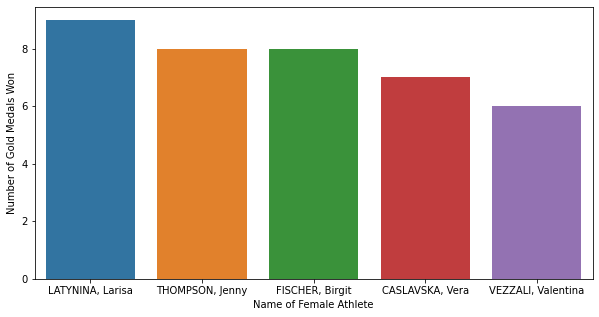

In [30]:
most_female_gold_medalists = olympics[(olympics['Medal']=='Gold') & (olympics['Gender']=='Women')].groupby('Athlete').agg({'Medal': 'count'})
most_female_gold_medalists .reset_index(inplace=True)
most_female_gold_medalists .sort_values(by='Medal',ascending=False,inplace=True)
most_female_gold_medalists  = most_female_gold_medalists .head()
a_dimension = (10, 5)
fig, ax = plt.subplots(figsize=a_dimension)
sns.barplot(x='Athlete',y='Medal',data=most_female_gold_medalists ,ax=ax)
plt.xlabel("Name of Female Athlete")
plt.ylabel("Number of Gold Medals Won")
most_female_gold_medalists 